In [15]:
import pandas as pd
df = pd.read_excel('plot_data.xlsx',sheet_name = 'Sheet1')
df

,Month,SAC,SAC.1,SAC.2,SAC.3,ICB,ICB.1,ICB.2,ICB.3,SPU,SPU.1,SPU.2,SPU.3,TOTAL,TOTAL.1,TOTAL.2,TOTAL.3
0,NaN,2017月度实际,2018月度目标,2018月度实际,2018月度达成率,2017月度实际,2018月度目标,2018月度实际,2018月度达成率,2017月度实际,2018月度目标,2018月度实际,2018月度达成率,2017月度实际,2018月度目标,2018月度实际,2018月度达成率
1,Jan,424,700,797,1.14,454,785,855,NaN,389,750,503,0.71,1267,2235,2155,1.24
2,Feb,570,600,607,1,643,563,1009,NaN,456,800,490,0.52,1669,1963,2106,1.1
3,Mar,728,800,840,1.05,503,489,847,NaN,789,850,506,0.55,2020,2139,2193,1.17
4,Apr,763,750,800,NaN,490,975,913,NaN,864,700,565,NaN,2117,2452,2278,NaN
5,May,855,800,835,NaN,506,684,955,NaN,498,950,480,NaN,1859,2434,2270,NaN
6,Jun,709,850,912,NaN,565,565,804,NaN,465,1000,450,NaN,1739,2415,2166,NaN
7,Jul,847,700,786,NaN,480,756,898,NaN,565,850,489,NaN,1892,2306,2173,NaN
8,Aug,913,950,823,NaN,450,584,768,NaN,756,1100,875,NaN,2119,2634,2466,NaN
9,Sep,955,800,989,NaN,489,688,888,NaN,584,1000,687,NaN,2028,2488,2564,NaN


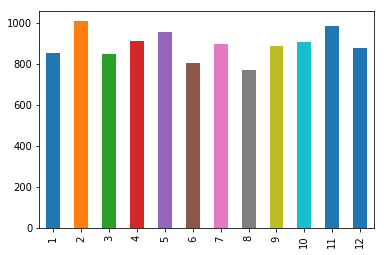

In [16]:
df['ICB.2'][1:].plot(kind='bar')

# 销售额情况
## 部门1
是范德萨发

## 部门2 

In [17]:
from bokeh.io import output_notebook ,show 
output_notebook()

Loading BokehJS ...

In [18]:
df['Month']

0     NaN
1     Jan
2     Feb
3     Mar
4     Apr
5     May
6     Jun
7     Jul
8     Aug
9     Sep
10    Oct
11    Nov
12    Dec
Name: Month, dtype: object

In [19]:
df['SAC'][1:]

1     424
2     570
3     728
4     763
5     855
6     709
7     847
8     913
9     955
10    804
11    890
12    789
Name: SAC, dtype: object

In [20]:
from bokeh.core.properties import value
from bokeh.plotting import figure,ColumnDataSource
from bokeh.models import HoverTool

# set x axis
x = list(df['Month'][1:])

# set colors
colors = ["#FC9D8A", "#F9CDAD", "#C8C8A9"]
colors2 = ['salmon', 'red', 'paleturquoise']

depart_list = ['SAC','ICB', 'SPU']

#三组叠加的数据
sac_list = list(df['SAC'])[1:]
icb_list = list(df['ICB'])[1:]
spu_list = list(df['SPU'])[1:]
tot_list = list(df['TOTAL'])[1:]

#生成数据
data = {
    'x':x,
    'SAC':sac_list,
    'ICB':icb_list,
    'SPU':spu_list,
    'tot':tot_list,
}

hover1 = HoverTool(tooltips=[("时间", '@x'),
                             ("月总销售额","@tot"),
                             ("SAC","@SAC"),
                             ("ICB","@ICB"),
                             ("SPU","@SPU")])

p = figure(x_range=x, plot_height=500, plot_width = 800,
           title="2018年各部门销售额", 
           y_axis_label='销售额(万元)', x_axis_label='时间',
           toolbar_location='right',)
p.add_tools(hover1)
p.vbar_stack(depart_list,x='x',width=0.6,source=data,color=colors2)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
show(p)

In [21]:
from bokeh.models import FactorRange         #设置x坐标轴
from bokeh.models import LinearAxis,Range1d  #设置双y轴
from bokeh.models import ColumnDataSource    #整合数据
from bokeh.transform import factor_cmap      #颜色
from bokeh.models import HoverTool

#x坐标轴坐标两个参数
months = list(df['Month'][1:])
depart_list = ['SAC','ICB', 'SPU']

#y轴高度
sac_list = list(df['SAC'])[1:]
icb_list = list(df['ICB'])[1:]
spu_list = list(df['SPU'])[1:]

tot_target =df['TOTAL.1'][1:]
tot_real = df['TOTAL.2'][1:]
y2 = tot_real/tot_target * 100

data = {
    'SAC':sac_list,
    'ICB':icb_list,
    'SPU':spu_list,
}

colors2 = ['salmon', 'darkseagreen', 'paleturquoise']

#设置x坐标轴
x = [(month,dep) for month in months for dep in depart_list]
#设置竖直
counts = sum(zip(data['SAC'],data['ICB'],data['SPU']),())

source = ColumnDataSource(data =dict(
    x=x,
    counts = counts,
))

p = figure(x_range=FactorRange(*x), 
           plot_height=450, plot_width=1000, 
           title="2017年月度实际部门销售额度",
           y_axis_label='销售额(万元)', x_axis_label='时间/部门')



p.vbar(x='x',top='counts',width=1 ,source=source,line_color = 'white',
       fill_color=factor_cmap('x', palette=colors2, factors=depart_list, start=1, end=2))

# ["#FC9D9A", "#F9CDAD", "#C8C8A9"]

p.extra_y_ranges = {"foo":Range1d(start = 0,end = 150)}

p.line(months,y2,color = 'pink',y_range_name = "foo")
p.circle(months,y2,color = 'red',y_range_name = "foo")

p.add_layout(LinearAxis(y_range_name = "foo"),"right")

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

# set hover function
hover1 = HoverTool(tooltips=[("时间/部门", '@x'),("销售额","@counts"+"万元")], 
                  mode ='vline')
p.add_tools(hover1)

show(p)
